**Question 10**: Use the Verlet method to calculate the orbit of the Earth around the Sun. The equations of motion for the position $r=(x,y)$ of the planet in its orbital plane are: $$\frac{d^{2}x(t)}{dt^{2}}=-G\,M\,\frac{x}{r^{3}},\;\frac{d^{2}y(t)}{dt^{2}}=-G\,M\,\frac{y}{r^{3}},$$ where $r=\sqrt{x^{2}+y^{2}}$.

**Task**: Calculate the orbit of the Earth around the Sun in steps of one hour for a total period of four years. Use the solution for the orbit, $r(t)$, and the velocity, $v(t)$, to calculate additionally the potential and kinetic energy of Earth at each evaluation point. Create a function `potentialEnergy(r,par)` and a function `kineticEnergy(v,par)` which implement these requested calculations separately from solving the ODE's and can be called from tests. Also create a function `solve(par)` which returns the value arrays for $r(t)$ and $v(t)$ as a tuple such that the tests can call `solve(par)` and obtain the results. Note that the potential energy depends only on the Earth location, $r(t)$, and its kinetic energy only on its velocity, $v(t)$. The variable `par` should be a tuple containing the required constant values in order `(G,M,m)`, see Data below.

**Data**: Use $G=6.6738\times{}10^{-11}$ m$^{3}$kg$^{-1}$s$^{-2}$ as Newton's gravitational constant, $M=1.9891\times{}10^{30}$ kg as mass of the Sun. For Earth mass, use $m=5.9722\times{}10^{24}$ kg. The initial conditions should be $r_{0}=(1.521\times{}10^{11},0)$ m and $v_{0}=(0,2.9291\times{}10^{4})$ ms$^{-1}$. Time evaluation points are in the task description and note that you work in SI units.

Create two plots: **(a)** draw the kinetic energy, potential energy and total energy, superimposed on a single canvas and observe how the kinetic and potential energies change as a function of time while the total energy appears to be constant.

**(b)** Plot only the total energy as a function of time and observe the oscillating character while the mean remains constant to high precision which demonstrates the inherent energy conservation of the Verlet method.

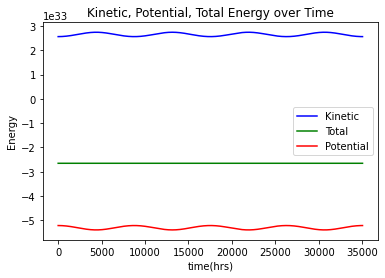

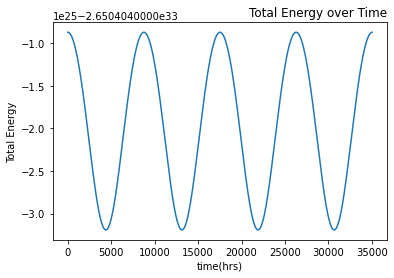

In [4]:
''' Using the Verlet method to calculate the orbit of the Earth
around the Sun'''

import numpy as np
import matplotlib.pyplot as plt

def solve(par):
    '''solves the equations of motion for the position of the planet in its
    orbital plane'''
    r = np.zeros([35040, 2])
    v = np.zeros([35040, 2])
    r[0][0] = 1.521*(10**11)
    r[0][1] = 0
    v[0][0] = 0
    v[0][1] = 2.9291*(10**4)
    G_const = par[0]
    M_sun = par[1]
    vhalfx = v[0][0] - 0.5*3600*G_const*M_sun*r[0][0]/((1.521*(10**11))**3)
    vhalfy = v[0][1]
    for i in range(35040-1):
        r[i+1][0] = r[i][0] + 3600*vhalfx
        r[i+1][1] = r[i][1] + 3600*vhalfy
        v[i+1][0] = vhalfx - 0.5*3600*(G_const*M_sun*r[i+1][0]/
                                  ((r[i+1][0]**2 + r[i+1][1]**2)**(3/2)))
        v[i+1][1] = vhalfy - 0.5*3600*(G_const*M_sun*r[i+1][1]/
                                  ((r[i+1][0]**2 + r[i+1][1]**2)**(3/2)))
        vhalfx = v[i+1][0] - 0.5*3600*G_const*M_sun*r[i+1][0]/((r[i+1][0]**2 + r[i+1][1]**2)**(3/2))
        vhalfy = v[i+1][1] - 0.5*3600*G_const*M_sun*r[i+1][1]/(
            ((r[i+1][0]**2 + r[i+1][1]**2)**(3/2)))
    return r, v

def kineticEnergy(v, par):
    '''calculates kinetic energy'''
    m = par[2]
    v_norm = []
    for k in v:
        v_norm.append(np.linalg.norm(k))
    v_norm = np.array(v_norm)
    return 0.5*m*(v_norm**2)

def potentialEnergy(r, par):
    '''calculates potential energy'''
    G_const = par[0]
    M_sun = par[1]
    m = par[2]
    R=[]
    for k in r:
        R.append(np.linalg.norm(k))
    R = np.array(R)
    return -G_const*M_sun*m/R

#(a)
my_par = (6.6738*(10**-11), 1.9891*(10**30), 5.9722*(10**24))
my_r, my_v = solve(my_par)
my_Pe = potentialEnergy(my_r, my_par)
my_Ke = kineticEnergy(my_v, my_par)
my_total = my_Pe + my_Ke

t = np.arange(0, len(my_Pe))
plt.plot(t, my_Ke, 'b', label='Kinetic')
plt.plot(t, my_total, 'g', label='Total')
plt.plot(t, my_Pe, 'r', label='Potential')
plt.xlabel('time(hrs)')
plt.ylabel('Energy')
plt.title('Kinetic, Potential, Total Energy over Time')
plt.legend()
plt.show()

#(b)
plt.plot(t, my_total)
plt.xlabel('time(hrs)')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time', loc='Right')
plt.show()


In [2]:
# Test
a = 6.6738e-11 # Gravitational constant
b = 1.9891e30 # [kg]
c = 5.9722e24 # [kg]
p = (a,b,c)
rv,vv = solve(p)
assert (rv.shape[0]==4*365*24 and vv.shape[0]==rv.shape[0]), 'wrong number of evaluation points'

In [3]:
# Test cell
Pe = potentialEnergy(rv, p)
Ke = kineticEnergy(vv, p)
total = Pe + Ke
assert (abs(1.0-np.max(total)/np.mean(total))<1e-8), 'wrong total energy precision'